<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
# Data Cleaning and Feature Engineering
### Python functions - `.apply()` 

---

### Key Terms:
- `.apply()`

### Expected Knowledge:
- Manipulating data with Pandas

In [1]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

# Lesson Structure:


In this lesson we will revise how to define fuctions in Python, cover an alternative syntax, and learn how to use them to 'clean' data. 

In the first part, we will play with toy dataset of names and ages. 

In the second, we will use the same techniques to perform some feature engineering on comments submitted to the New York Times, with the goal of building a machine learning model that can identify editorial worthy comments.

# A review of Python functions

Conceptually, a function `f` ingests an item `x`, does something to it, and spits out a corresponding value `f(x)`
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Function_machine2.svg/220px-Function_machine2.svg.png)

In [2]:
# Here is an example of a function that doubles the input
def double(x):
    return x*2

# Example usage
for i in range(5):
    print('double applied to {} is {}'.format(i, double(i)))

double applied to 0 is 0
double applied to 1 is 2
double applied to 2 is 4
double applied to 3 is 6
double applied to 4 is 8


In [3]:
# Here is an example of a function that ingests some text 
# which is assumed to be a name in the format "Name Surname"
# and returns the initials.
def get_initials(x):
    name, surname = x.split(' ')
    return name[0] + surname[0]

# Example ussage
for i in ['John Smith', 'John Kennedy', 'Janne Austin', 'Elisabeth Swann']:
    print('get_initials applied to "{}" is "{}"'.format(i, get_initials(i)))

get_initials applied to "John Smith" is "JS"
get_initials applied to "John Kennedy" is "JK"
get_initials applied to "Janne Austin" is "JA"
get_initials applied to "Elisabeth Swann" is "ES"


In [4]:
# That said, functions can (and will) result in errors, usually when 
# an assumption about the inputs fails to hold. e.g.

# get_initials(25)

# Exercises:

##### Challenge 1: 
Define a function `fahrenheit_to_celcius` that takes in a temperature in fahrenheit and return its equivalent in celcius.

$$\text{temp_in_celcius} = (\text{temp_in_fahrenheit}-32)*5/9$$

eg.
`fahrenheit_to_celcius(98)` $\rightarrow$ `36.7`

##### Challenge 2: 
Define a function `text_to_number` that takes in string representing a number, e.g. `'1,300.96'` and returns it as a number.

##### Challenge 3: 
Define a function `length_of_text` that takes in string and returns the number of words in it.

# An alternative syntax for defining functions

The basic syntax is:

`lambda` x: `give me back this` if `this is true` else `give me this`

NOTE: This way of defining fuctions is very limited! It can only be used for simple functions that can be writen in a single line of Python.

In [5]:
# An abstract example
my_function = lambda x: f(x) if condition else g(x)

In [6]:
# A concrete example 
my_function = lambda x: x*3 if x < 10 else x*2

# Excercises

Rewrite the `fahrenheit_to_celcius`, `text_to_number`, and `length_of_text` using the lambda notation.

In [7]:
# fahrenheit_to_celcius = lambda x: ...


In [8]:
# text_to_number = lambda x: ...


In [9]:
# length_of_text = lambda x: ...


In the next section, we will look a very convenient way to `apply` a function to a list of inputs, and get the corresponding outputs. 

![](https://media1.giphy.com/media/Cbpeku5dzbrcQ/giphy.gif)

# Applying functions to a Pandas Series

In [10]:
numbers = pd.Series([10,20,30,40,50])

numbers

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [11]:
double = lambda x: x*2 

numbers.apply(double)

0     20
1     40
2     60
3     80
4    100
dtype: int64

In [12]:
# More succinctly
numbers.apply(lambda x: x*2)

0     20
1     40
2     60
3     80
4    100
dtype: int64

# A more interesting example

In [13]:
example_data = {
    'Name': ['Mr. John Smith', 'Ms. Jane Smith','Dr. Robert McCartney'],
    'Age':[44, 39, 40]
}

data = pd.DataFrame(example_data)
data.head()

,Name,Age
0,Mr. John Smith,44
1,Ms. Jane Smith,39
2,Dr. Robert McCartney,40


In [14]:
# We can create a function that gives us the title component of the name.
get_title = lambda name: name.split(' ')[0]

print(get_title('Mr. John Smith'))
print(get_title('Ms. Jane Smith'))
print(get_title('Dr. Robert McCartney'))

Mr.
Ms.
Dr.


### Applying the function to a Pandas Series

In [15]:
data['Name']

0          Mr. John Smith
1          Ms. Jane Smith
2    Dr. Robert McCartney
Name: Name, dtype: object

In [16]:
data['Name'].apply(get_title)

0    Mr.
1    Ms.
2    Dr.
Name: Name, dtype: object

In [17]:
# We can then create a new column in our table to store this output
data['Title'] = data['Name'].apply(get_title)
data.head()

,Name,Age,Title
0,Mr. John Smith,44,Mr.
1,Ms. Jane Smith,39,Ms.
2,Dr. Robert McCartney,40,Dr.


In [18]:
# Alternatively
data['Title'] = data['Name'].apply(lambda x: x.split(' ')[0])
data.head()

,Name,Age,Title
0,Mr. John Smith,44,Mr.
1,Ms. Jane Smith,39,Ms.
2,Dr. Robert McCartney,40,Dr.


# Exercises:

In [19]:
# Add a Surname column


In [20]:
# Add a HasDoctorate column


In [21]:
data.head()

,Name,Age,Title
0,Mr. John Smith,44,Mr.
1,Ms. Jane Smith,39,Ms.
2,Dr. Robert McCartney,40,Dr.


![](https://www.nytco.com/wp-content/themes/nytco/images/nytco/NYT-wordmark.png)

# NY Comments

In [22]:
comments = pd.read_csv('https://raw.githubusercontent.com/mkleinbort/resource-datasets/master/ny_times_comments/CommentsApril2017_simple.csv')

In [23]:
comments.head()

,commentBody,recommendations,replyCount,editorsSelection
0,We need a shot down of the self-serving ONGRES...,1.0,0.0,False
1,Mining for coal and oil have caused untold dis...,3.0,0.0,False
2,Congratulations NYT for excellent work for you...,1.0,0.0,False
3,"If you want to beat Facebook, just provide vid...",2.0,0.0,False
4,will trump turn out to be the American Right's...,0.0,0.0,False


# Part 1: Never skip EDA

In [24]:
# Look at the number of rows and columns
comments.shape

(9000, 4)

In [25]:
# Confirming dtypes
comments.dtypes

commentBody          object
recommendations     float64
replyCount          float64
editorsSelection       bool
dtype: object

In [26]:
# Number of unique values in each column
comments.nunique()

commentBody         9000
recommendations      888
replyCount            69
editorsSelection       2
dtype: int64

In [27]:
# How many comments were selected by the editors?
comments['editorsSelection'].value_counts()

True     4500
False    4500
Name: editorsSelection, dtype: int64

# Part 2: Preparing the data

For the purposes of this lesson, we'll be trying to predict whether a comment will be selected by the editors using only the comment itself.

In [28]:
# Separating the features from the target
y = comments['editorsSelection']
features = comments[['commentBody']]

features.head()

,commentBody
0,We need a shot down of the self-serving ONGRES...
1,Mining for coal and oil have caused untold dis...
2,Congratulations NYT for excellent work for you...
3,"If you want to beat Facebook, just provide vid..."
4,will trump turn out to be the American Right's...


### Creating numeric features

In [29]:
# Let's create a column that tracks the wordcount of each comment.
features['commentLength'] = features['commentBody'].apply(lambda x: len(x.split(' ')))
features.head()

,commentBody,commentLength
0,We need a shot down of the self-serving ONGRES...,16
1,Mining for coal and oil have caused untold dis...,50
2,Congratulations NYT for excellent work for you...,152
3,"If you want to beat Facebook, just provide vid...",16
4,will trump turn out to be the American Right's...,28


In [30]:
# Let's create a column that tracks the # of ALLCAPS words.
def count_allcaps(text):
    total = 0
    for word in text.split(' '):
        if word.isupper():
            total += 1
    return total

features['countAllCaps'] = features['commentBody'].apply(count_allcaps)
features.head()

,commentBody,commentLength,countAllCaps
0,We need a shot down of the self-serving ONGRES...,16,1
1,Mining for coal and oil have caused untold dis...,50,1
2,Congratulations NYT for excellent work for you...,152,4
3,"If you want to beat Facebook, just provide vid...",16,0
4,will trump turn out to be the American Right's...,28,0


In [31]:
# Let's create a column that tracks if the first word is capitalized.
features['startsWithCap'] = features['commentBody'].apply(lambda x : x[0].isupper())
features.head()

,commentBody,commentLength,countAllCaps,startsWithCap
0,We need a shot down of the self-serving ONGRES...,16,1,True
1,Mining for coal and oil have caused untold dis...,50,1,True
2,Congratulations NYT for excellent work for you...,152,4,True
3,"If you want to beat Facebook, just provide vid...",16,0,True
4,will trump turn out to be the American Right's...,28,0,False


In [32]:
# Let's create a column that tracks if the # of words with the first letter capitalized.
def count_capitalized(text):
    total = 0
    for word in text.split(' '):
        if word.istitle():
            total += 1
    return total

features['countStartsWithCap'] = features['commentBody'].apply(count_capitalized)
features.head()

,commentBody,commentLength,countAllCaps,startsWithCap,countStartsWithCap
0,We need a shot down of the self-serving ONGRES...,16,1,True,1
1,Mining for coal and oil have caused untold dis...,50,1,True,3
2,Congratulations NYT for excellent work for you...,152,4,True,17
3,"If you want to beat Facebook, just provide vid...",16,0,True,2
4,will trump turn out to be the American Right's...,28,0,False,6


In [33]:
X = features.drop(['commentBody'], axis=1)

In [34]:
X.shape

(9000, 4)

In [35]:
X.head()

,commentLength,countAllCaps,startsWithCap,countStartsWithCap
0,16,1,True,1
1,50,1,True,3
2,152,4,True,17
3,16,0,True,2
4,28,0,False,6


# Part 3: Training Models

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Training a LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6444444444444445

### Training a LogisticRegression with a different C value.

A smaller C value means the model will overfit the data less.

In [38]:
lr = LogisticRegression(C=0.001)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6583333333333333

### Training a SVM

In [39]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.6522222222222223

### Training and SVM with a different kernel

In [40]:
svc = SVC(kernel='sigmoid')

svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.48777777777777775

Best model so far: 

Logistic Regression with C=0.001

# Part 2: Preparing the data (Again)

In [41]:
features.head()

,commentBody,commentLength,countAllCaps,startsWithCap,countStartsWithCap
0,We need a shot down of the self-serving ONGRES...,16,1,True,1
1,Mining for coal and oil have caused untold dis...,50,1,True,3
2,Congratulations NYT for excellent work for you...,152,4,True,17
3,"If you want to beat Facebook, just provide vid...",16,0,True,2
4,will trump turn out to be the American Right's...,28,0,False,6


In [42]:
X.head()

,commentLength,countAllCaps,startsWithCap,countStartsWithCap
0,16,1,True,1
1,50,1,True,3
2,152,4,True,17
3,16,0,True,2
4,28,0,False,6


# Sentiment analysis with Python

Disclaimer: This is a very crude method.

In [43]:
# !pip install textblob
from textblob.en.sentiments import PatternAnalyzer

pa = PatternAnalyzer()

In [44]:
# Example usage
pa.analyze('I LOVE puppies.')

Sentiment(polarity=0.5, subjectivity=0.6)

In [45]:
pa.analyze('This cake is great.')

Sentiment(polarity=0.8, subjectivity=0.75)

In [46]:
pa.analyze('The new law makes me angry.')

Sentiment(polarity=-0.18181818181818182, subjectivity=0.7272727272727273)

In [47]:
pa.analyze('I hate the ending of that movie.')

Sentiment(polarity=-0.8, subjectivity=0.9)

In [48]:
# How to select only the polarity score
pa.analyze('I hate the ending of that movie.').polarity

-0.8

# Applying this to the NY comments dataset


In [49]:
X.head()

,commentLength,countAllCaps,startsWithCap,countStartsWithCap
0,16,1,True,1
1,50,1,True,3
2,152,4,True,17
3,16,0,True,2
4,28,0,False,6


In [50]:
X['polarity'] = features['commentBody'].apply(lambda x: pa.analyze(x).polarity)
X.head()

,commentLength,countAllCaps,startsWithCap,countStartsWithCap,polarity
0,16,1,True,1,-0.155556
1,50,1,True,3,0.000000
2,152,4,True,17,0.243740
3,16,0,True,2,0.000000
4,28,0,False,6,0.128571


# Part 3: Training Models (Again)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [52]:
lr = LogisticRegression(C=0.001)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6583333333333333

# Part 4: Model Evaluation

In [53]:
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, X, model):
    classes = model.classes_
    confusion_matrix_values = confusion_matrix(y_true, model.predict(X), labels=classes)
    data_frame = pd.DataFrame(confusion_matrix_values, 
                              columns=[['Model Prediction','Model Prediction'],classes],
                              index=[['Actual Value','Actual Value'],classes])
    return data_frame

cm = make_confusion_matrix(y_test, X_test, lr)
cm

Model Prediction      
                              False True 
Actual Value False              554   330
             True               285   631

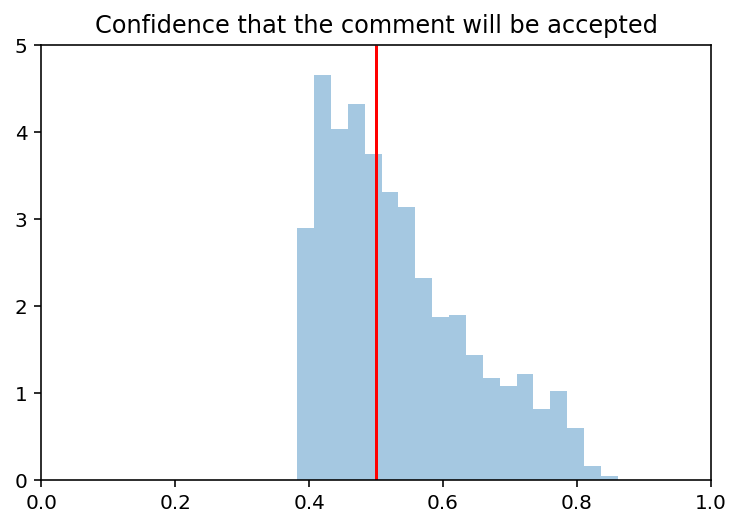

In [54]:
y_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

sns.distplot(y_proba[:,1], norm_hist=True, kde=False)
plt.xlim([0,1])
plt.ylim([0,5])
plt.title('Confidence that the comment will be accepted')
plt.vlines(x=0.5, ymin=0, ymax=5, colors='r')
plt.show()

In [55]:
lr.classes_

array([False,  True])

In [56]:
from sklearn.metrics import accuracy_score

# Our model is not very good at detecting comments editors will adore.
accuracy_score(y_test[y_proba[:,1] > 0.8], y_pred[y_proba[:,1] > 0.8])

0.7058823529411765

In [57]:
# Our model much better at detecting comments editors will readily reject.
accuracy_score(y_test[y_proba[:,1] < 0.4], y_pred[y_proba[:,1] < 0.4])

0.8571428571428571

# Code Summary

In [58]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

from textblob.en.sentiments import PatternAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

comments = pd.read_csv('https://raw.githubusercontent.com/mkleinbort/resource-datasets/master/ny_times_comments/CommentsApril2017_simple.csv')

# Separating the features from the target
y = comments['editorsSelection']
features = comments[['commentBody']]

# Let's create a column that tracks the wordcount of each comment.
features['commentLength'] = features['commentBody'].apply(lambda x: len(x.split(' ')))

# Let's create a column that tracks the # of ALLCAPS words.
def count_allcaps(text):
    total = 0
    for word in text.split(' '):
        if word.isupper():
            total += 1
    return total

features['countAllCaps'] = features['commentBody'].apply(count_allcaps)


# Let's create a column that tracks if the first word is capitalized.
features['startsWithCap'] = features['commentBody'].apply(lambda x : x[0].isupper())

# Let's create a column that tracks if the # of words with the first letter capitalized.
def count_capitalized(text):
    total = 0
    for word in text.split(' '):
        if word.istitle():
            total += 1
    return total

features['countStartsWithCap'] = features['commentBody'].apply(count_capitalized)

# Let's get a crude estimate of the polarity of each comment.

pa = PatternAnalyzer()

features['polarity'] = features['commentBody'].apply(lambda x: pa.analyze(x).polarity)

X = features.drop(['commentBody'], axis=1)

# Performing a train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Instanciating a model with hyperparameters of our choice
lr = LogisticRegression(C=0.001)

# Fitting the model on the training data
lr.fit(X_train, y_train)

# Scoring the model on our test data
lr.score(X_test, y_test)

0.6583333333333333